In [2]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.transforms import RandomAffine, Normalize, ToTensor, ToPILImage, Resize, InterpolationMode
import torch
import numpy as np

In [4]:
img = cv2.cvtColor(cv2.imread('./img/dyna/dynamite.png'), cv2.COLOR_BGR2RGB)

(500, 500, 3)

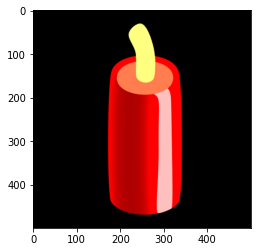

In [5]:
plt.imshow(img)
img.shape

In [7]:
# horizontal and vertical shift
timg = torch.from_numpy(np.transpose(cv2.cvtColor(cv2.imread('./img/dyna/dynamite.png'), cv2.COLOR_BGR2RGB), (2, 0, 1)))
timgw = torch.from_numpy(np.transpose(cv2.cvtColor(cv2.imread('./img/dyna/dynawick.png'), cv2.COLOR_BGR2RGB), (2, 0, 1)))
for i in range(4):
  rnd = np.transpose(RandomAffine(0, (.1, .05))(timg).numpy(), (1,2,0))
  rndw = np.transpose(RandomAffine(0, (.1, .05))(timgw).numpy(), (1,2,0))
  cv2.imwrite(f"./dataset/pos/shift{i}.png", cv2.cvtColor(rnd, cv2.COLOR_BGR2RGB))
  cv2.imwrite(f"./dataset/pos/shiftwick{i}.png", cv2.cvtColor(rndw, cv2.COLOR_BGR2RGB))  

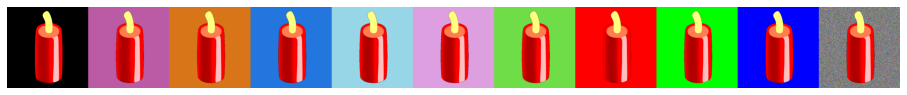

In [8]:
# background augmentation
bgs = [
  *[np.random.randint(0, 255, 3) for i in range(6)],
  [255,0,0], [0,255,0], [0,0,255], None
]
I = [img.copy()]
for bg in bgs:
  imgcp = img.copy()
  for px in range(500):
    for py in range(500):
      rgb = imgcp[px][py]
      if sum(rgb) <= 1:
        if bg is None:
          imgcp[px][py] = np.random.randint(0, 255, 3)
        else:
          imgcp[px][py] = bg
  I.append(imgcp)
plt.figure(figsize=(16,16))
plt.axis('off')
plt.imshow(np.concatenate(I, axis=1))

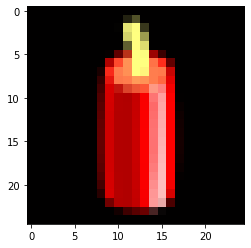

In [9]:
plt.imshow(cv2.resize(img, dsize=(25,25), interpolation=cv2.INTER_AREA))
Resize((25,25))(ToPILImage()(img))

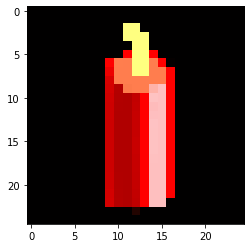

In [12]:
tensor_img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
plt.imshow(np.transpose(Resize(size=(25,25))(tensor_img).numpy(), (1,2,0)))

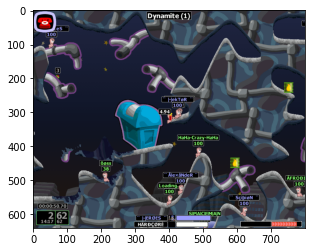

In [13]:
imgu = cv2.cvtColor(cv2.imread('./img/dyna/dynau1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imgu)

(25, 25, 3)

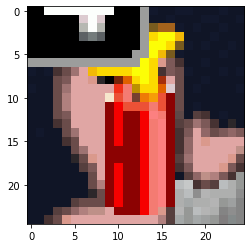

In [14]:
shrink = 300
n = imgu[shrink:-shrink-15,392:-383,:]
plt.imshow(n)
cv2.imwrite("./dataset/pos/puttoright1.png", cv2.cvtColor(n, cv2.COLOR_BGR2RGB))
n.shape

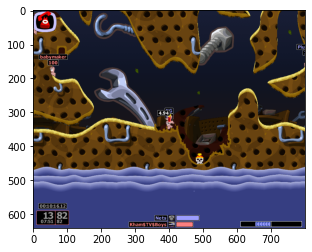

In [15]:
imgu2 = cv2.cvtColor(cv2.imread('./img/dyna/dynau2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imgu2)

(25, 25, 3)

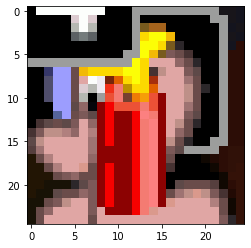

In [16]:
shrink = 300
n2 = imgu2[shrink+4:-shrink-11,390:-385,:]
plt.imshow(n2)
cv2.imwrite("./dataset/pos/puttoleft1.png", cv2.cvtColor(n2, cv2.COLOR_BGR2RGB))
n2.shape

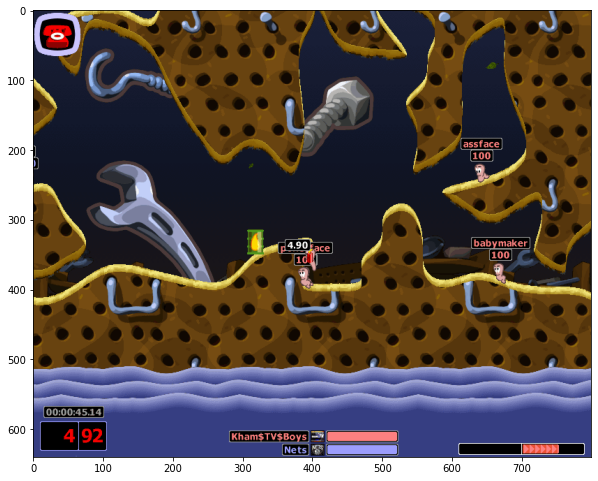

(640, 800, 3)

In [17]:
imgneg = cv2.cvtColor(cv2.imread('./img/negative.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(imgneg)
plt.show()
imgneg.shape

In [65]:
kernel = 25
stride = 40
I = []
for xi in range(0, len(imgneg), stride):
  for yi in range(0, len(imgneg[xi]), stride):
    # TODO crop the image so that the padding won't be required
    padd = np.zeros((kernel,kernel,3), np.uint8)
    targ = imgneg[xi:xi+kernel,yi:yi+kernel,:]
    s = targ.shape
    padd[:s[0], :s[1], :] = targ
    I.append(padd)
len(I)

320

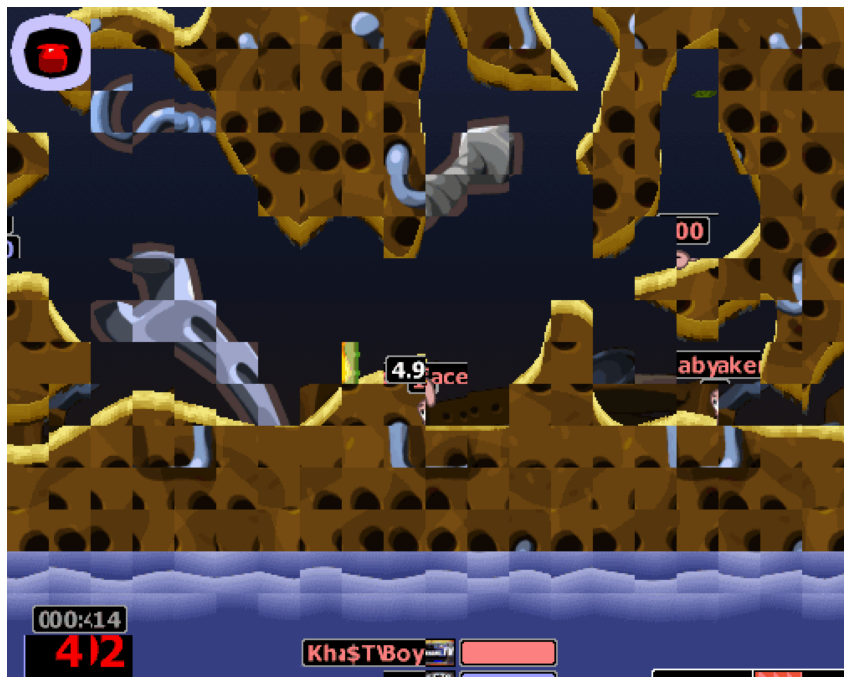

In [68]:
# tiled negatives -- no dyna included
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.vstack([np.concatenate(I[i:i+20], axis=1) for i in range(0, len(I), 20)]))
plt.show()

In [69]:
for i in range(len(I)):
  cv2.imwrite(f"./dataset/neg/tools{i}.png", cv2.cvtColor(I[i], cv2.COLOR_BGR2RGB))

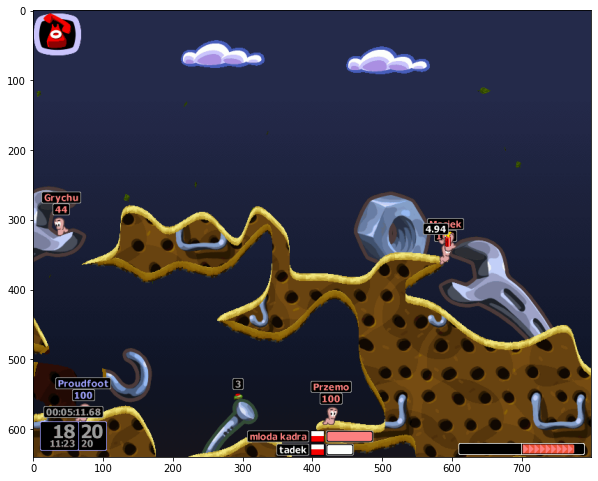

(640, 800, 3)

In [73]:
imgatt = cv2.cvtColor(cv2.imread('./img/att.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(imgatt)
plt.show()
imgatt.shape

(25, 25, 3)

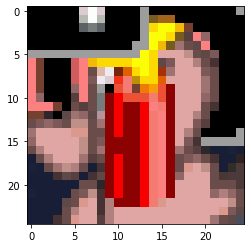

In [95]:
x,y = 316,582
imgattcrop = imgatt[x:x+25,y:y+25,:]
plt.imshow(imgattcrop)
cv2.imwrite("./dataset/pos/puttoleft2.png", cv2.cvtColor(imgattcrop, cv2.COLOR_BGR2RGB))
imgattcrop.shape